In [50]:
from astroquery.svo_fps import SvoFps
from os import sys
from calibrimbore import synmag, get_pb_zpt
from glob import glob
import pysynphot as S
import astropy.table as at
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd

In [7]:
bp = SvoFps.get_transmission_data('GAIA/GAIA3.Gbp')
G = SvoFps.get_transmission_data('GAIA/GAIA3.G')
rp = SvoFps.get_transmission_data('GAIA/GAIA3.Grp')

In [52]:
specs = glob('/Users/rri38/Documents/work/code/source_synphot/ck_spec_files/*')
specs.sort()
names = []
for spec in specs:
    names += [spec.split('/')[-1]]

In [24]:
b = S.ArrayBandpass(bp['Wavelength'].data.data, bp['Transmission'].data.data, waveunits='Angstrom')

In [42]:
bmag = []
band = S.ArrayBandpass(bp['Wavelength'].data.data, bp['Transmission'].data.data, waveunits='Angstrom')
zp = get_pb_zpt(band, reference='ab', model_mag=0)
for i in range(len(specs)):
    spec = at.Table.read(specs[i], format='ascii')
    spec = S.ArraySpectrum(spec['wave'], spec['flux'], fluxunits='flam',keepneg=True)
    # get the theoretical zeropoint for the loaded bandpass
    bmag += [synmag(spec,band,zp)]
bmag = np.array(bmag)

In [43]:
rpmag = []
band = S.ArrayBandpass(rp['Wavelength'].data.data, rp['Transmission'].data.data, waveunits='Angstrom')
zp = get_pb_zpt(band, reference='ab', model_mag=0)
for i in range(len(specs)):
    spec = at.Table.read(specs[i], format='ascii')
    spec = S.ArraySpectrum(spec['wave'], spec['flux'], fluxunits='flam',keepneg=True)
    # get the theoretical zeropoint for the loaded bandpass
    rpmag += [synmag(spec,band,zp)]
rpmag = np.array(rpmag)

In [44]:
Gmag = []
band = S.ArrayBandpass(G['Wavelength'].data.data, G['Transmission'].data.data, waveunits='Angstrom')
zp = get_pb_zpt(band, reference='ab', model_mag=0)
for i in range(len(specs)):
    spec = at.Table.read(specs[i], format='ascii')
    spec = S.ArraySpectrum(spec['wave'], spec['flux'], fluxunits='flam',keepneg=True)
    # get the theoretical zeropoint for the loaded bandpass
    Gmag += [synmag(spec,band,zp)]
Gmag = np.array(Gmag)

<IPython.core.display.Javascript object>


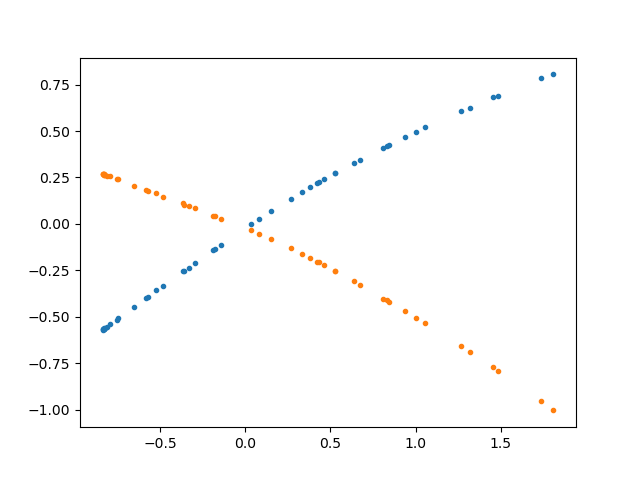

In [49]:
plt.figure()
plt.plot(bmag-rpmag,Gmag-rpmag,'.')
plt.plot(bmag-rpmag,Gmag-bmag,'.')

In [55]:
df = pd.DataFrame(data = names,columns=['model'])
df['G-Bp'] = Gmag - bmag
df['G-Rp'] = Gmag - rpmag
df['Bp-Rp'] = bmag - rpmag

In [57]:
df.to_csv('ckmodel_Gaia_colors.csv',index=False)

In [8]:
b = S.ArrayBandpass(band[:,0], band[:,1], waveunits='Angstrom',name=self.name)
# get the theoretical zeropoint for the loaded bandpass
zp = get_pb_zpt(band, reference='ab', model_mag=0)
synmag(spec,self.band,self.zp)

Wavelength,Transmission
AA,
float64,float64
3250.0,3.87054116e-05
3260.0,0.000175771984
3270.0,0.000649485416
3280.0,0.0019669082
3290.0,0.00501083084
3300.0,0.0109458069
3310.0,0.0207035425
3320.0,0.0346967871


In [30]:
spec = at.Table.read(specs[0], format='ascii')
spec = S.ArraySpectrum(spec['wave'], spec['flux'], fluxunits='flam',keepneg=True)

In [31]:
spec